In [1]:
import pathlib
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
)

from yellowbrick.classifier import (
    ClassificationReport,
    DiscriminationThreshold,
)

In [2]:
dataset_folder = pathlib.Path("../../Datasets")
dataset_name = "kdd2004.csv"
dataset_path = dataset_folder/dataset_name

In [3]:
df = pd.read_csv(dataset_path)

# Remapping target classes
df["target"] = df["target"].map({-1:0, 1:1})

df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [4]:
print(f"Dataset shape: {df.shape}\n")
print(f"Distribution of the target:\n{df['target'].value_counts(normalize=True)}")

Dataset shape: (145751, 75)

Distribution of the target:
0    0.991108
1    0.008892
Name: target, dtype: float64


In [5]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=["target"], axis=1), df["target"], test_size=0.3)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [6]:
# Baseline prediction
y_train_baseline = pd.Series(np.zeros_like(y_train))
y_test_baseline = pd.Series(np.zeros_like(y_test))

In [7]:
# Training a random forest model
rf = RandomForestClassifier(n_estimators=100, max_depth=2)
rf.fit(X_train, y_train)

# Training a logistic regression model
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

C:\Users\safou\anaconda3\envs\imbalanced_env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## Overall precision, recall and f1-score of each model

In [8]:
# As the denominator in the baseline model is TP+FP=0, precision's not defined
print(f"Precision of the baseline model: {precision_score(y_test, y_test_baseline)}")

# When using `predict` in scikit-learn, the threshold is 0.5.
print(f"Precision of Random Forest model: {precision_score(y_test, rf.predict(X_test))}")
print(f"Precision of Logisitic Regression model: {precision_score(y_test, logit.predict(X_test))}")

C:\Users\safou\anaconda3\envs\imbalanced_env\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Precision of the baseline model: 0.0
Precision of Random Forest model: 0.99581589958159
Precision of Logisitic Regression model: 0.9514563106796117


In [9]:
print(f"Recall of the baseline model: {recall_score(y_test, y_test_baseline)}")
# When using `predict` in scikit-learn, the threshold is 0.5.
print(f"Recall of Random Forest model: {recall_score(y_test, rf.predict(X_test))}")
print(f"Recall of Logisitic Regression model: {recall_score(y_test, logit.predict(X_test))}")

Recall of the baseline model: 0.0
Recall of Random Forest model: 0.568019093078759
Recall of Logisitic Regression model: 0.7016706443914081


In [10]:
print(f"F1-score of the baseline model: {f1_score(y_test, y_test_baseline)}")
# When using `predict` in scikit-learn, the threshold is 0.5.
print(f"F1-score of Random Forest model: {f1_score(y_test, rf.predict(X_test))}")
print(f"F1-score of Logisitic Regression model: {f1_score(y_test, logit.predict(X_test))}")

F1-score of the baseline model: 0.0
F1-score of Random Forest model: 0.723404255319149
F1-score of Logisitic Regression model: 0.8076923076923076


## Yellowbrick

In [11]:
visualizer = ClassificationReport(logit)

C:\Users\safou\anaconda3\envs\imbalanced_env\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


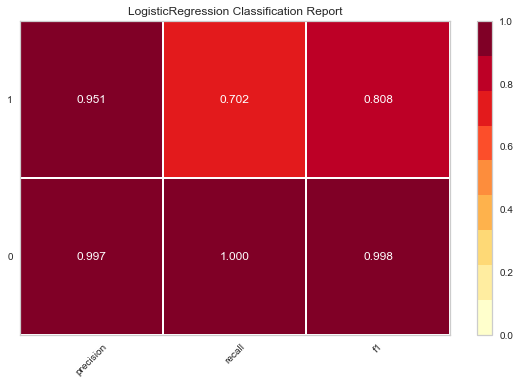

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [12]:
visualizer.score(X_test, y_test)
visualizer.show()

C:\Users\safou\anaconda3\envs\imbalanced_env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


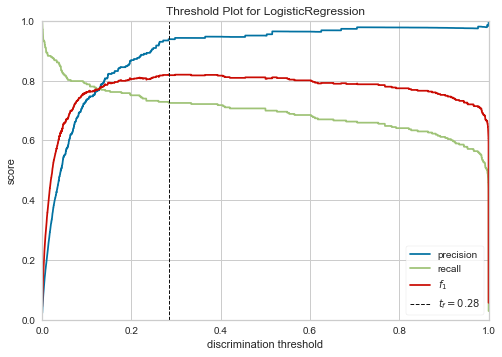

<AxesSubplot:title={'center':'Threshold Plot for LogisticRegression'}, xlabel='discrimination threshold', ylabel='score'>

In [13]:
visualizer = DiscriminationThreshold(estimator=logit, n_trials=1, cv=0.3, argmax="fscore", is_fitted=True, exclude="queue_rate")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()